In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib


# Balanced synthetic dataset generator, used for the model training
def generate_balanced_synthetic_data(num_samples: int = 1000) -> pd.DataFrame:
    '''
    Generates a synthetic dataset for platelets donation scenarios based on a set of expert rules.

    This function creates random data for all specified parameters and then applies a
    series of rules (translated from the provided JSON) to assign an appropriate
    outcome for each generated scenario.

    Args:
        num_samples (int): The number of synthetic data samples to generate.

    Returns:
        pd.DataFrame:   A DataFrame containing the generated synthetic data, including
                        all features and the determined 'outcome' label.
    '''
    # Ensures the number of samples is a multiple of 10 for future processing
    assert num_samples % 10 == 0, 'The number of samples must be a multiple of 10'
    # Initialise an empty list to store the generated features
    data = []
    # Generating a balanced dataset, where each class will have a similar amount of labels
    n_samples_split = num_samples // 9

    # Generating random samples for the outcome 'Inform nurse and lower AC concentration'
    for _ in range(n_samples_split):
        features = {
            'donorAge': np.random.randint(18, 76),
            'donorHasACReactionSymptoms': 'yes',
            'firstDonation': np.random.choice(['yes', 'no']),
            'machineRedSquares': np.random.randint(0, 12),
            'reactionSeverity': np.random.choice(['low', 'medium']),
            'donorCurrentDonationReaction': np.random.randint(1, 3),
            'timePressureBarGoingToYellowInSeconds': np.random.randint(0, 7),
            'donorHasReactionHistory': np.random.choice(['yes', 'no']),
            'instancesMachineWasStopped': np.random.randint(0, 3),
            'cuffPressureON': np.random.choice(['yes', 'no']),
            'lowerPlateletsCount': np.random.randint(130, 251),
            'donationElapsedTime': np.random.randint(5, 70),
            'isDonorSqueezingDuringReturn': np.random.choice(['yes', 'no']),
            'donorSex': np.random.choice(['F', 'M']),
            'needleAdjusted': np.random.randint(0, 3),
            'isCuffpressureHigh': np.random.choice(['yes', 'no']),
            'isNeedleVibrating': np.random.choice(['yes', 'no']),
            'donorHasLowDrawHistory': np.random.choice(['yes', 'no']),
            'donorHasHighReturnHistory': np.random.choice(['yes', 'no']),
            'donorEBV': round(np.random.uniform(3.5, 5.5), 1),
            'heathpadON': np.random.choice(['yes', 'no']),
            'machineRedSquaresVarianceInCicles': np.random.randint(0, 17),
            'pressureBarGoingToYellow': np.random.choice(['yes', 'no']),
        }
        # Set the predefined outcome
        features['outcome'] = 'Inform nurse and lower AC concentration'
        # Adds features to the data list
        data.append(features)

    # Generating random samples for the outcome 'First needle adjustment'
    for _ in range(n_samples_split):
        features = {
            'donorAge': np.random.randint(18, 70),
            'donorHasACReactionSymptoms': np.random.choice(['yes', 'no']),
            'firstDonation': np.random.choice(['yes', 'no']),
            'machineRedSquares': np.random.randint(3, 7),
            'reactionSeverity': np.random.choice(['none', 'low', 'medium']),
            'donorCurrentDonationReaction': np.random.randint(0, 2),
            'timePressureBarGoingToYellowInSeconds': np.random.randint(0, 7),
            'donorHasReactionHistory': np.random.choice(['yes', 'no']),
            'instancesMachineWasStopped': np.random.randint(0, 4),
            'cuffPressureON': 'yes',
            'lowerPlateletsCount': np.random.randint(150, 400),
            'donationElapsedTime': np.random.randint(5, 50),
            'isDonorSqueezingDuringReturn': np.random.choice(['yes', 'no']),
            'donorSex': np.random.choice(['F', 'M']),
            'needleAdjusted': 0,
            'isCuffpressureHigh': np.random.choice(['yes', 'no']),
            'isNeedleVibrating': 'yes',
            'donorHasLowDrawHistory': np.random.choice(['yes', 'no']),
            'donorHasHighReturnHistory': np.random.choice(['yes', 'no']),
            'donorEBV': round(np.random.uniform(3.5, 7.0), 1),
            'heathpadON': 'yes',
            'machineRedSquaresVarianceInCicles': np.random.randint(0, 4),
            'pressureBarGoingToYellow': np.random.choice(['yes', 'no']),
        }
        features['outcome'] = 'First needle adjustment'
        data.append(features)

    # Generating random samples for the outcome 'Second needle adjustment'
    for _ in range(n_samples_split):
        features = {
            'donorAge': np.random.randint(18, 70),
            'donorHasACReactionSymptoms': np.random.choice(['yes', 'no']),
            'firstDonation': np.random.choice(['yes', 'no']),
            'machineRedSquares': np.random.randint(5, 10),
            'reactionSeverity': np.random.choice(['none', 'low', 'medium']),
            'donorCurrentDonationReaction': np.random.randint(0, 2),
            'timePressureBarGoingToYellowInSeconds': np.random.randint(0, 7),
            'donorHasReactionHistory': np.random.choice(['yes', 'no']),
            'instancesMachineWasStopped': np.random.randint(0, 4),
            'cuffPressureON': 'yes',
            'lowerPlateletsCount': np.random.randint(150, 400),
            'donationElapsedTime': np.random.randint(5, 50),
            'isDonorSqueezingDuringReturn': np.random.choice(['yes', 'no']),
            'donorSex': np.random.choice(['F', 'M']),
            'needleAdjusted': 1,
            'isCuffpressureHigh': np.random.choice(['yes', 'no']),
            'isNeedleVibrating': 'yes',
            'donorHasLowDrawHistory': np.random.choice(['yes', 'no']),
            'donorHasHighReturnHistory': np.random.choice(['yes', 'no']),
            'donorEBV': round(np.random.uniform(3.5, 7.0), 1),
            'heathpadON': 'yes',
            'machineRedSquaresVarianceInCicles': np.random.randint(0, 8),
            'pressureBarGoingToYellow': np.random.choice(['yes', 'no']),
        }
        features['outcome'] = 'Second needle adjustment'
        data.append(features)

    # Generating random samples for the outcome 'Lower return speed from terminal'
    for _ in range(n_samples_split):
        features = {
            'donorAge': np.random.randint(18, 75),
            'donorHasACReactionSymptoms': np.random.choice(['yes', 'no']),
            'firstDonation': np.random.choice(['yes', 'no']),
            'machineRedSquares': np.random.randint(0, 10),
            'reactionSeverity': np.random.choice(['none', 'low', 'medium']),
            'donorCurrentDonationReaction': np.random.randint(0, 3),
            'timePressureBarGoingToYellowInSeconds': np.random.randint(4, 11), # 4 - 10
            'donorHasReactionHistory': np.random.choice(['yes', 'no']),
            'instancesMachineWasStopped': np.random.randint(0, 3),
            'cuffPressureON': np.random.choice(['yes', 'no']),
            'lowerPlateletsCount': np.random.randint(150, 400),
            'donationElapsedTime': np.random.randint(6, 80),
            'isDonorSqueezingDuringReturn': 'no',
            'donorSex': np.random.choice(['F', 'M']),
            'needleAdjusted': np.random.randint(0, 3),
            'isCuffpressureHigh': 'no',
            'isNeedleVibrating': np.random.choice(['yes', 'no']),
            'donorHasLowDrawHistory': np.random.choice(['yes', 'no']),
            'donorHasHighReturnHistory': np.random.choice(['yes', 'no']),
            'donorEBV': round(np.random.uniform(3.5, 7.0), 1),
            'heathpadON': np.random.choice(['yes', 'no']),
            'machineRedSquaresVarianceInCicles': np.random.randint(0, 17),
            'pressureBarGoingToYellow': 'yes',
        }
        features['outcome'] = 'Lower return speed from terminal'
        data.append(features)

    # Generating random samples for the outcome 'End donation, AC toxicity reached'
    for _ in range(n_samples_split):
        features = {
            'donorAge': np.random.randint(18, 75),
            'donorHasACReactionSymptoms': 'yes',
            'firstDonation': np.random.choice(['yes', 'no']),
            'machineRedSquares': np.random.randint(0, 10),
            'reactionSeverity': 'high',
            'donorCurrentDonationReaction': np.random.randint(1, 4),
            'timePressureBarGoingToYellowInSeconds': np.random.randint(0, 10),
            'donorHasReactionHistory': np.random.choice(['yes', 'no']),
            'instancesMachineWasStopped': np.random.randint(0, 3),
            'cuffPressureON': np.random.choice(['yes', 'no']),
            'lowerPlateletsCount': np.random.randint(150, 400),
            'donationElapsedTime': np.random.randint(5, 50),
            'isDonorSqueezingDuringReturn': np.random.choice(['yes', 'no']),
            'donorSex': np.random.choice(['M', 'F']),
            'needleAdjusted': np.random.randint(0, 3),
            'isCuffpressureHigh': np.random.choice(['yes', 'no']),
            'isNeedleVibrating': np.random.choice(['yes', 'no']),
            'donorHasLowDrawHistory': np.random.choice(['yes', 'no']),
            'donorHasHighReturnHistory': np.random.choice(['yes', 'no']),
            'donorEBV': round(np.random.uniform(3.5, 7.1), 1),
            'heathpadON': np.random.choice(['yes', 'no']),
            'machineRedSquaresVarianceInCicles': np.random.randint(0, 31),
            'pressureBarGoingToYellow': np.random.choice(['yes', 'no']),
        }
        features['outcome'] = 'End donation, AC toxicity reached'
        data.append(features)

    # Generating random samples for the outcome 'End donation, AC toxicity buildup'
    for _ in range(n_samples_split):
        features = {
            'donorAge': np.random.randint(18, 75),
            'donorHasACReactionSymptoms': 'yes',
            'firstDonation': np.random.choice(['yes', 'no']),
            'machineRedSquares': np.random.randint(0, 10),
            'reactionSeverity': np.random.choice(['medium', 'low']),
            'donorCurrentDonationReaction': 3,
            'timePressureBarGoingToYellowInSeconds': np.random.randint(0, 10),
            'donorHasReactionHistory': np.random.choice(['yes', 'no']),
            'instancesMachineWasStopped': np.random.randint(0, 3),
            'cuffPressureON': np.random.choice(['yes', 'no']),
            'lowerPlateletsCount': np.random.randint(150, 400),
            'donationElapsedTime': np.random.randint(5, 50),
            'isDonorSqueezingDuringReturn': np.random.choice(['yes', 'no']),
            'donorSex': np.random.choice(['M', 'F']),
            'needleAdjusted': np.random.randint(0, 3),
            'isCuffpressureHigh': np.random.choice(['yes', 'no']),
            'isNeedleVibrating': np.random.choice(['yes', 'no']),
            'donorHasLowDrawHistory': np.random.choice(['yes', 'no']),
            'donorHasHighReturnHistory': np.random.choice(['yes', 'no']),
            'donorEBV': round(np.random.uniform(3.5, 7.1), 1),
            'heathpadON': np.random.choice(['yes', 'no']),
            'machineRedSquaresVarianceInCicles': np.random.randint(0, 31),
            'pressureBarGoingToYellow': np.random.choice(['yes', 'no']),
        }
        features['outcome'] = 'End donation, AC toxicity buildup'
        data.append(features)

    # Generating random samples for the outcome 'Pause machine for 1 minute and inform nurse'
    for _ in range(n_samples_split):
        features = {
            'donorAge': np.random.randint(36, 75),
            'donorHasACReactionSymptoms': 'yes',
            'firstDonation': np.random.choice(['yes', 'no']),
            'machineRedSquares': np.random.randint(0, 4),
            'reactionSeverity': np.random.choice(['medium', 'low']),
            'donorCurrentDonationReaction': np.random.randint(1, 3),
            'timePressureBarGoingToYellowInSeconds': np.random.randint(0, 10),
            'donorHasReactionHistory': np.random.choice(['yes', 'no']),
            'instancesMachineWasStopped': np.random.randint(0, 4),
            'cuffPressureON': np.random.choice(['yes', 'no']),
            'lowerPlateletsCount': np.random.randint(250, 400),
            'donationElapsedTime': np.random.randint(5, 70),
            'isDonorSqueezingDuringReturn': np.random.choice(['yes', 'no']),
            'donorSex': 'M',
            'needleAdjusted': np.random.randint(0, 2),
            'isCuffpressureHigh': np.random.choice(['yes', 'no']),
            'isNeedleVibrating': np.random.choice(['yes', 'no']),
            'donorHasLowDrawHistory': np.random.choice(['yes', 'no']),
            'donorHasHighReturnHistory': np.random.choice(['yes', 'no']),
            'donorEBV': round(np.random.uniform(5.6, 7.5), 1),
            'heathpadON': np.random.choice(['yes', 'no']),
            'machineRedSquaresVarianceInCicles': np.random.randint(0, 17),
            'pressureBarGoingToYellow': np.random.choice(['yes', 'no']),
        }
        features['outcome'] = 'Pause machine for 1 minute and inform nurse'
        data.append(features)

    # Generating random samples for the outcome 'End donation, give rinseback'
    for _ in range(n_samples_split):
        features = {
            'donorAge': np.random.randint(18, 65),
            'donorHasACReactionSymptoms': np.random.choice(['yes', 'no']),
            'firstDonation': np.random.choice(['yes', 'no']),
            'machineRedSquares': np.random.randint(10, 20),
            'reactionSeverity': np.random.choice(['none', 'low', 'medium']),
            'donorCurrentDonationReaction': np.random.randint(0, 2),
            'timePressureBarGoingToYellowInSeconds': np.random.randint(0, 7),
            'donorHasReactionHistory': np.random.choice(['yes', 'no']),
            'instancesMachineWasStopped': np.random.randint(2, 4),
            'cuffPressureON': 'yes',
            'lowerPlateletsCount': np.random.randint(150, 400),
            'donationElapsedTime': np.random.randint(0, 70),
            'isDonorSqueezingDuringReturn': np.random.choice(['yes', 'no']),
            'donorSex': np.random.choice(['F', 'M']),
            'needleAdjusted': np.random.randint(1, 3),
            'isCuffpressureHigh': np.random.choice(['yes', 'no']),
            'isNeedleVibrating': np.random.choice(['yes', 'no']),
            'donorHasLowDrawHistory': np.random.choice(['yes', 'no']),
            'donorHasHighReturnHistory': np.random.choice(['yes', 'no']),
            'donorEBV': round(np.random.uniform(3.5, 7.0), 1),
            'heathpadON': np.random.choice(['yes', 'no']),
            'machineRedSquaresVarianceInCicles': np.random.randint(0, 4),
            'pressureBarGoingToYellow': np.random.choice(['yes', 'no']),
        }
        features['outcome'] = 'End donation, give rinseback'
        data.append(features)

    # Generating random samples for no specific outcome, the outcome will most likely be 'No action'
    for _ in range(num_samples-(n_samples_split*7)):
        features = {
            'donorAge': np.random.randint(18, 75),
            'donorHasACReactionSymptoms': np.random.choice(['yes', 'no']),
            'firstDonation': np.random.choice(['yes', 'no']),
            'machineRedSquares': np.random.randint(0, 10),
            'reactionSeverity': np.random.choice(['none', 'low', 'medium', 'high']),
            'donorCurrentDonationReaction': np.random.randint(0, 2),
            'timePressureBarGoingToYellowInSeconds': np.random.randint(0, 8),
            'donorHasReactionHistory': np.random.choice(['yes', 'no']),
            'instancesMachineWasStopped': np.random.randint(0, 3),
            'cuffPressureON': np.random.choice(['yes', 'no']),
            'lowerPlateletsCount': np.random.randint(250, 400),
            'donationElapsedTime': np.random.randint(5, 80),
            'isDonorSqueezingDuringReturn': np.random.choice(['yes', 'no']),
            'donorSex': np.random.choice(['F', 'M']),
            'needleAdjusted': np.random.randint(0, 2),
            'isCuffpressureHigh': np.random.choice(['yes', 'no']),
            'isNeedleVibrating': np.random.choice(['yes', 'no']),
            'donorHasLowDrawHistory': np.random.choice(['yes', 'no']),
            'donorHasHighReturnHistory': np.random.choice(['yes', 'no']),
            'donorEBV': round(np.random.uniform(3.5, 7.0), 1),
            'heathpadON': np.random.choice(['yes', 'no']),
            'machineRedSquaresVarianceInCicles': np.random.randint(0, 18),
            'pressureBarGoingToYellow': np.random.choice(['yes', 'no']),
        }

        # Apply the JSON rules using an if/elif structure to determine the outcome
        outcome = "No Action"  # Default outcome if no rules are met

        # Rule: EndDonationDueToACReaction
        if (features['donorHasACReactionSymptoms'] == 'yes' and
                features['reactionSeverity'] == 'high'):
            outcome = "End donation, AC toxicity reached"

        # Rule: EndDonationDueToACBuildup
        elif (features['donorHasACReactionSymptoms'] == 'yes' and
                features['reactionSeverity'] in ['low', 'medium'] and
                features['donorCurrentDonationReaction'] == 3):
            outcome = "End donation, AC toxicity buildup"

        # Rule: LowerACConcentration
        elif (features['donorHasACReactionSymptoms'] == 'yes' and
            features['donorCurrentDonationReaction'] < 3 and
            features['donorEBV'] <= 5.5 and
            features['reactionSeverity'] in ['low', 'medium'] and
            features['lowerPlateletsCount'] < 250):
            outcome = "Inform nurse and lower AC concentration"

        # Rule: AdjustNeedle - 1
        elif (features['needleAdjusted'] == 0 and
                features['cuffPressureON'] == 'yes' and
                features['isNeedleVibrating'] == 'yes' and
                features['heathpadON'] == 'yes' and
                3 <= features['machineRedSquares'] <= 6 and
                features['machineRedSquaresVarianceInCicles'] <= 2):
            outcome = "First needle adjustment"

        # Rule: AdjustNeedle - 2
        elif (features['needleAdjusted'] == 1 and
                features['cuffPressureON'] == 'yes' and
                features['isNeedleVibrating'] == 'yes' and
                features['heathpadON'] == 'yes' and
                5 <= features['machineRedSquares'] <= 9 and
                0 <= features['machineRedSquaresVarianceInCicles'] <= 7):
            outcome = "Second needle adjustment"

        # Rule: LowerReturnSpeed
        elif (features['isDonorSqueezingDuringReturn'] == 'no' and
                features['isCuffpressureHigh'] == 'no' and
                features['pressureBarGoingToYellow'] == 'yes' and
                features['timePressureBarGoingToYellowInSeconds'] >= 4 and
                features['donationElapsedTime'] > 5):
            outcome = "Lower return speed from terminal"

        # Rule: pauseMachineDueToACReaction
        elif (features['donorHasACReactionSymptoms'] == 'yes' and
                features['donorCurrentDonationReaction'] < 3 and
                5.6 <= features['donorEBV'] <= 7.5 and
                features['reactionSeverity'] in ['low', 'medium'] and
                features['donorSex'] == 'M' and
                features['lowerPlateletsCount'] >= 250):
            outcome = "Pause machine for 1 minute and inform nurse"

        # Rule: EndDonationDueToLowDraw
        elif (features['needleAdjusted'] == 2 and
                features['cuffPressureON'] == 'yes' and
                features['heathpadON'] == 'yes' and
                features['machineRedSquares'] >= 10 and
                features['machineRedSquaresVarianceInCicles'] <= 3):
            outcome = "End donation, give rinseback"

        features['outcome'] = outcome
        data.append(features)

    # Convert the list of dictionaries to a pandas DataFrame
    return pd.DataFrame(data)


# Synthetic dataset generator, not used for the model training
def generate_synthetic_data(num_samples: int = 1000) -> pd.DataFrame:
    '''
    Generates a synthetic dataset for platelets donation scenarios based on a set of expert rules.

    This function creates random data for all specified parameters and then applies a
    series of rules (translated from the provided JSON) to assign an appropriate
    outcome for each generated scenario.

    Args:
        num_samples (int): The number of synthetic data samples to generate.

    Returns:
        pd.DataFrame:   A DataFrame containing the generated synthetic data, including
                        all features and the determined 'outcome' label.
    '''
    # Ensures the number of samples is a multiple of 10 for future processing
    assert num_samples % 10 == 0, 'The number of samples must be a multiple of 10'
    # Initialise an empty list to store the generated features
    data = []

    # Generating random samples for no specific outcome, the outcome will most likely be 'No action'
    for _ in range(num_samples):
        features = {
            'donorAge': np.random.randint(18, 75),
            'donorHasACReactionSymptoms': np.random.choice(['yes', 'no']),
            'firstDonation': np.random.choice(['yes', 'no']),
            'machineRedSquares': np.random.randint(0, 10),
            'reactionSeverity': np.random.choice(['none', 'low', 'medium', 'high']),
            'donorCurrentDonationReaction': np.random.randint(0, 2),
            'timePressureBarGoingToYellowInSeconds': np.random.randint(0, 8),
            'donorHasReactionHistory': np.random.choice(['yes', 'no']),
            'instancesMachineWasStopped': np.random.randint(0, 3),
            'cuffPressureON': np.random.choice(['yes', 'no']),
            'lowerPlateletsCount': np.random.randint(250, 400),
            'donationElapsedTime': np.random.randint(5, 80),
            'isDonorSqueezingDuringReturn': np.random.choice(['yes', 'no']),
            'donorSex': np.random.choice(['F', 'M']),
            'needleAdjusted': np.random.randint(0, 2),
            'isCuffpressureHigh': np.random.choice(['yes', 'no']),
            'isNeedleVibrating': np.random.choice(['yes', 'no']),
            'donorHasLowDrawHistory': np.random.choice(['yes', 'no']),
            'donorHasHighReturnHistory': np.random.choice(['yes', 'no']),
            'donorEBV': round(np.random.uniform(3.5, 7.0), 1),
            'heathpadON': np.random.choice(['yes', 'no']),
            'machineRedSquaresVarianceInCicles': np.random.randint(0, 18),
            'pressureBarGoingToYellow': np.random.choice(['yes', 'no']),
        }

        # Apply the JSON rules using an if/elif structure to determine the outcome
        outcome = "No Action"  # Default outcome if no rules are met

        # Rule: EndDonationDueToACReaction
        if (features['donorHasACReactionSymptoms'] == 'yes' and
                features['reactionSeverity'] == 'high'):
            outcome = "End donation, AC toxicity reached"

        # Rule: EndDonationDueToACBuildup
        elif (features['donorHasACReactionSymptoms'] == 'yes' and
                features['reactionSeverity'] in ['low', 'medium'] and
                features['donorCurrentDonationReaction'] == 3):
            outcome = "End donation, AC toxicity buildup"

        # Rule: LowerACConcentration
        elif (features['donorHasACReactionSymptoms'] == 'yes' and
            features['donorCurrentDonationReaction'] < 3 and
            features['donorEBV'] <= 5.5 and
            features['reactionSeverity'] in ['low', 'medium'] and
            features['lowerPlateletsCount'] < 250):
            outcome = "Inform nurse and lower AC concentration"

        # Rule: AdjustNeedle - 1
        elif (features['needleAdjusted'] == 0 and
                features['cuffPressureON'] == 'yes' and
                features['isNeedleVibrating'] == 'yes' and
                features['heathpadON'] == 'yes' and
                3 <= features['machineRedSquares'] <= 6 and
                features['machineRedSquaresVarianceInCicles'] <= 2):
            outcome = "First needle adjustment"

        # Rule: AdjustNeedle - 2
        elif (features['needleAdjusted'] == 1 and
                features['cuffPressureON'] == 'yes' and
                features['isNeedleVibrating'] == 'yes' and
                features['heathpadON'] == 'yes' and
                5 <= features['machineRedSquares'] <= 9 and
                0 <= features['machineRedSquaresVarianceInCicles'] <= 7):
            outcome = "Second needle adjustment"

        # Rule: LowerReturnSpeed
        elif (features['isDonorSqueezingDuringReturn'] == 'no' and
                features['isCuffpressureHigh'] == 'no' and
                features['pressureBarGoingToYellow'] == 'yes' and
                features['timePressureBarGoingToYellowInSeconds'] >= 4 and
                features['donationElapsedTime'] > 5):
            outcome = "Lower return speed from terminal"

        # Rule: pauseMachineDueToACReaction
        elif (features['donorHasACReactionSymptoms'] == 'yes' and
                features['donorCurrentDonationReaction'] < 3 and
                5.6 <= features['donorEBV'] <= 7.5 and
                features['reactionSeverity'] in ['low', 'medium'] and
                features['donorSex'] == 'M' and
                features['lowerPlateletsCount'] >= 250):
            outcome = "Pause machine for 1 minute and inform nurse"

        # Rule: EndDonationDueToLowDraw
        elif (features['needleAdjusted'] == 2 and
                features['cuffPressureON'] == 'yes' and
                features['heathpadON'] == 'yes' and
                features['machineRedSquares'] >= 10 and
                features['machineRedSquaresVarianceInCicles'] <= 3):
            outcome = "End donation, give rinseback"

        features['outcome'] = outcome
        data.append(features)

    # Convert the list of dictionaries to a pandas DataFrame
    return pd.DataFrame(data)


## Generate synthetic dataset and store it in the /data folder

In [5]:
# Generate a dataset with 500_000 samples
synthetic_dataframe = generate_balanced_synthetic_data(num_samples=500000)

# Print the distribution of the outcomes to see how often each rule was triggered
print("--- Distribution of Outcomes ---\n")
print(synthetic_dataframe['outcome'].value_counts())
print("\n" + "="*40 + "\n")

print(f'Dataset rows: {len(synthetic_dataframe)}')


--- Distribution of Outcomes ---

outcome
No Action                                      84329
End donation, AC toxicity reached              69428
Lower return speed from terminal               61378
Pause machine for 1 minute and inform nurse    60854
Second needle adjustment                       56905
First needle adjustment                        55996
Inform nurse and lower AC concentration        55555
End donation, AC toxicity buildup              55555
End donation, give rinseback                   55555
Name: count, dtype: int64


Dataset rows: 555555


In [7]:
# Number of desired data chunks
n = 55

# Calculate the size of each chunk
chunk_size = len(synthetic_dataframe) // n

# Use a list comprehension with .iloc to create a list of smaller DataFrames
list_of_dfs = [synthetic_dataframe.iloc[i * chunk_size:(i + 1) * chunk_size] for i in range(n)]

# Print the shape of each new DataFrame to verify the size is manageable for my machine
for i, chunk in enumerate(list_of_dfs):
    print(f'DataFrame {i+1} shape: {chunk.shape}')

DataFrame 1 shape: (10101, 24)
DataFrame 2 shape: (10101, 24)
DataFrame 3 shape: (10101, 24)
DataFrame 4 shape: (10101, 24)
DataFrame 5 shape: (10101, 24)
DataFrame 6 shape: (10101, 24)
DataFrame 7 shape: (10101, 24)
DataFrame 8 shape: (10101, 24)
DataFrame 9 shape: (10101, 24)
DataFrame 10 shape: (10101, 24)
DataFrame 11 shape: (10101, 24)
DataFrame 12 shape: (10101, 24)
DataFrame 13 shape: (10101, 24)
DataFrame 14 shape: (10101, 24)
DataFrame 15 shape: (10101, 24)
DataFrame 16 shape: (10101, 24)
DataFrame 17 shape: (10101, 24)
DataFrame 18 shape: (10101, 24)
DataFrame 19 shape: (10101, 24)
DataFrame 20 shape: (10101, 24)
DataFrame 21 shape: (10101, 24)
DataFrame 22 shape: (10101, 24)
DataFrame 23 shape: (10101, 24)
DataFrame 24 shape: (10101, 24)
DataFrame 25 shape: (10101, 24)
DataFrame 26 shape: (10101, 24)
DataFrame 27 shape: (10101, 24)
DataFrame 28 shape: (10101, 24)
DataFrame 29 shape: (10101, 24)
DataFrame 30 shape: (10101, 24)
DataFrame 31 shape: (10101, 24)
DataFrame 32 shap

In [8]:
# Visualise a sample of the dataset
list_of_dfs[0].head()

,donorAge,donorHasACReactionSymptoms,firstDonation,machineRedSquares,reactionSeverity,donorCurrentDonationReaction,timePressureBarGoingToYellowInSeconds,donorHasReactionHistory,instancesMachineWasStopped,cuffPressureON,...,needleAdjusted,isCuffpressureHigh,isNeedleVibrating,donorHasLowDrawHistory,donorHasHighReturnHistory,donorEBV,heathpadON,machineRedSquaresVarianceInCicles,pressureBarGoingToYellow,outcome
0,66,yes,yes,6,medium,1,6,yes,1,yes,...,2,yes,yes,yes,yes,5.1,no,10,no,Inform nurse and lower AC concentration
1,33,yes,no,5,medium,1,4,yes,0,yes,...,1,yes,no,no,yes,3.7,yes,10,yes,Inform nurse and lower AC concentration
2,74,yes,yes,5,medium,2,5,no,0,no,...,2,no,no,yes,yes,4.8,yes,13,no,Inform nurse and lower AC concentration
3,54,yes,yes,7,low,2,0,yes,2,no,...,1,no,no,no,yes,3.5,yes,1,no,Inform nurse and lower AC concentration
4,36,yes,yes,0,medium,1,2,yes,0,no,...,0,yes,no,no,no,5.1,yes,14,no,Inform nurse and lower AC concentration


### Saving the datasets

In [40]:
# Many datasets where saved before generating a satisfactory one, this dataset saved is the latest and most accurate
for idx, df in enumerate(list_of_dfs):
    df.to_csv(f'datasets/balanced/balanced_dataset_XXXL_V2/synthetic_platelets_dataset_{idx+1}.csv', index=False)

## Data processing

### Comparing initial dataset VS balanced dataset

#### STANDARD

In [13]:
# Generate a smaller dataset with 10_000 samples
synthetic_dataframe = generate_synthetic_data(num_samples=10000)

# Print the distribution of the outcomes to see how often each rule was triggered
print("--- Distribution of Outcomes ---\n")
print(synthetic_dataframe['outcome'].value_counts())
print("\n" + "="*40 + "\n")

print(f'Dataset rows: {len(synthetic_dataframe)}')

--- Distribution of Outcomes ---

outcome
No Action                                      7589
End donation, AC toxicity reached              1277
Lower return speed from terminal                525
Pause machine for 1 minute and inform nurse     449
Second needle adjustment                        130
First needle adjustment                          30
Name: count, dtype: int64


Dataset rows: 10000


In [15]:
# Preprocess Data (Convert categorical data to numbers)
print("Preprocessing data for the model...\n\n")
le_dict = {}
unbalanced_df_encoded = synthetic_dataframe.copy()
for col in synthetic_dataframe.columns:
    if synthetic_dataframe[col].dtype == 'object':
        le = LabelEncoder()
        unbalanced_df_encoded[col] = le.fit_transform(synthetic_dataframe[col])
        le_dict[col] = le # Store encoder to decode later

# Select the 'outcome' column
outcomes = unbalanced_df_encoded['outcome']

# Calculate skewness and kurtosis
summary = pd.DataFrame({
    'Skewness': [skew(outcomes)],
    'Excess Kurtosis': [kurtosis(outcomes)]
}, index=['outcomes'])

summary

Preprocessing data for the model...




,Skewness,Excess Kurtosis
outcomes,-1.58926,1.878683


In [45]:
# Select the total_bill column
outcomes = unbalanced_df_encoded['outcome']

# Calculate skewness and kurtosis
summary = pd.DataFrame({
    'Skewness': [skew(outcomes)],
    'Excess Kurtosis': [kurtosis(outcomes)]
}, index=['outcomes'])

summary

,Skewness,Excess Kurtosis
outcomes,-6.266706,41.772661


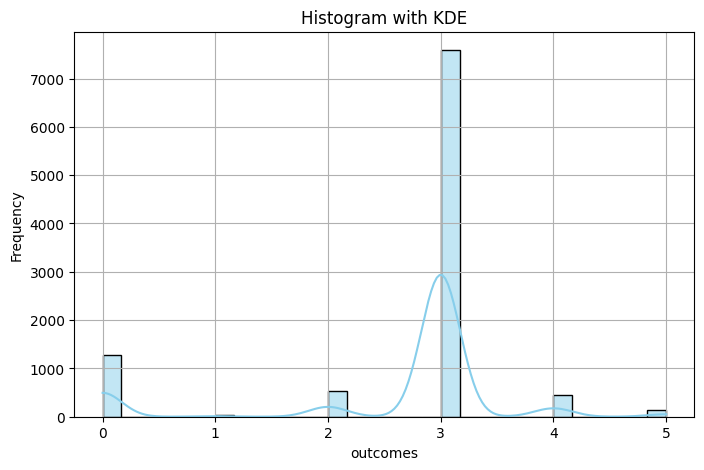

In [16]:
# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(outcomes, kde=True, bins=30, color='skyblue')
plt.title(f'Histogram with KDE')
plt.xlabel('outcomes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### BALANCED 

In [17]:
# Generate a list with all the paths to the chunks of the dataset
paths = [f'datasets/balanced/balanced_dataset_XXXL_V2/synthetic_platelets_dataset_{idx+1}.csv' for idx in range(50)]
# Read each dataset and store it in a list
df_collection = [pd.read_csv(path) for path in paths]
# Concatenates the datasets togheter to get the original size dataset
entire_dataset = pd.concat(df_collection, axis=0)

print(f'\nThe entire dataset consists of {len(entire_dataset)} rows\n')
print(f'The outcome distribution is the following:\n{entire_dataset['outcome'].value_counts()}\n')

# Preprocess Data (Convert categorical data to numbers)
print("\nPreprocessing data for the model...\n")
le_dict = {}
df_encoded = entire_dataset.copy()
for col in entire_dataset.columns:
    if entire_dataset[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(entire_dataset[col])
        le_dict[col] = le # Store encoder to decode later
# Visualise a sample of encoded data
df_encoded.head(5)


The entire dataset consists of 505050 rows

The outcome distribution is the following:
outcome
End donation, AC toxicity reached              62968
Lower return speed from terminal               58743
Pause machine for 1 minute and inform nurse    58404
Second needle adjustment                       56316
First needle adjustment                        55778
Inform nurse and lower AC concentration        55555
End donation, AC toxicity buildup              55555
End donation, give rinseback                   55555
No Action                                      46176
Name: count, dtype: int64


Preprocessing data for the model...



,donorAge,donorHasACReactionSymptoms,firstDonation,machineRedSquares,reactionSeverity,donorCurrentDonationReaction,timePressureBarGoingToYellowInSeconds,donorHasReactionHistory,instancesMachineWasStopped,cuffPressureON,...,needleAdjusted,isCuffpressureHigh,isNeedleVibrating,donorHasLowDrawHistory,donorHasHighReturnHistory,donorEBV,heathpadON,machineRedSquaresVarianceInCicles,pressureBarGoingToYellow,outcome
0,39,1,0,7,1,1,0,0,1,0,...,2,1,0,1,1,5.0,0,5,1,4
1,37,1,1,3,2,1,6,0,1,1,...,1,1,0,0,1,3.6,1,2,0,4
2,24,1,0,7,2,1,6,1,0,0,...,0,1,1,1,1,3.7,1,12,1,4
3,40,1,0,6,2,2,5,1,0,0,...,1,0,1,0,1,4.3,0,16,0,4
4,37,1,1,0,2,1,1,1,0,1,...,0,1,1,0,1,4.6,0,5,0,4


In [18]:
# Select the total_bill column
outcomes = df_encoded['outcome']

# Calculate skewness and kurtosis
summary = pd.DataFrame({
    'Skewness': [skew(outcomes)],
    'Excess Kurtosis': [kurtosis(outcomes)]
}, index=['outcomes'])

summary

,Skewness,Excess Kurtosis
outcomes,0.04392,-1.244464


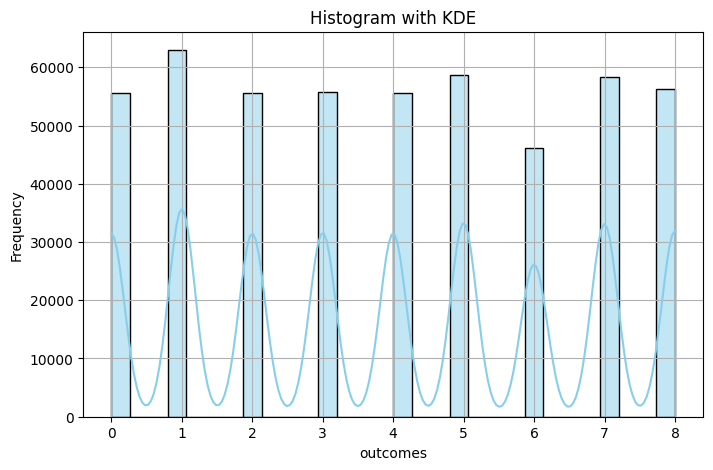

In [19]:
# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(outcomes, kde=True, bins=30, color='skyblue')
plt.title(f'Histogram with KDE')
plt.xlabel('outcomes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## MODEL TRAINING

In [45]:
# Standard RF training, using the best hyperparamteters found in the grid search
def train_tuned_model(X_train, y_train):
    """
    Trains a Random Forest classifier using the best hyperparameters 
    found with GridSearchCV.

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target labels (numeric).

    Returns:
        RandomForestClassifier: The fitted classifier.
    """

    # Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
    rf = RandomForestClassifier(
        random_state=37, 
        class_weight='balanced',
        n_estimators=200,
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=2
    )
    # Fit the model
    rf.fit(X_train, y_train)
    # Return the trained model
    return rf


# Training the model with grid search to find the optimal hyperparameters
def grid_search_training(X_train, y_train):
    """
    Trains a Random Forest classifier using GridSearchCV to find the
    best parameters, specifically optimizing for macro-average recall.

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target labels (numeric).

    Returns:
        RandomForestClassifier: The best_estimator_ found by GridSearchCV.
    """
    print("Starting hyperparameter tuning with GridSearchCV...")
    
    # Define the parameter grid to search
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_leaf': [1, 2, 5],
        'min_samples_split': [2, 5, 10]
    }
    
    # Initialize the base model
    rf = BalancedRandomForestClassifier(
        n_estimators=100,
        random_state=37,
        n_jobs=-1
    )
    
    # Initialize GridSearchCV
    # We set scoring='recall_macro' to tell the search to find the parameters that give the best *average recall* across all classes
    # 'cv=3' means 3-fold cross-validation. You can increase this (e.g., 5) for more robust results, but it will take longer
    # 'n_jobs=-1' uses all available CPU cores to speed up the search

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=3, 
        scoring='recall_macro', 
        n_jobs=-1, 
        verbose=2
    )
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    print("\nGrid search complete.")
    print(f"Best parameters found: {grid_search.best_params_}")
    print(f"Best macro-average recall score: {grid_search.best_score_:.4f}")
    
    # The grid_search object automatically refits the best model on the entire training set
    return grid_search.best_estimator_


# Model evaluation visualisation function
def evaluate_model(model, X_test, y_test, target_encoder):
    """
    Evaluates the trained model on the test set and prints a report.

    Args:
        model (RandomForestClassifier): The trained model.
        X_test (pd.DataFrame): Test features.
        y_test (pd.Series): Test target labels (numeric).
        target_encoder (LabelEncoder): The encoder used for the 'outcome' column,
                                        to print human-readable labels.
    """
    print("Evaluating model...")
    y_pred = model.predict(X_test)
    
    # Convert numeric predictions back to text labels for the report
    y_test_labels = target_encoder.inverse_transform(y_test)
    y_pred_labels = target_encoder.inverse_transform(y_pred)
    
    print(f"\nTest Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_labels, y_pred_labels))


# Function to calculate and visualise feature importance
def show_feature_importances(model, feature_names, top_n=20):
    '''
    Displays the most important features learned by the model.

    Args:
        model (RandomForestClassifier): The trained model.
        feature_names (list): The list of feature names corresponding
                            to the model's training data columns.
        top_n (int): The number of top features to display.
    '''
    print('-' * 30)
    print('Calculating feature importances...')
    
    importances = model.feature_importances_
    
    # Create a DataFrame for better visualization
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    
    # Sort by importance
    importance_df = importance_df.sort_values(by='importance', ascending=False)

    print(f'Top {top_n} Most Important Features (Learned 'Weights'):')
    print(importance_df.head(top_n))

    # Plot feature importances
    plt.figure(figsize=(10, 12))
    sns.barplot(
        x='importance', 
        y='feature', 
        data=importance_df.head(top_n)
    )
    plt.title(f'Top {top_n} Feature Importances')
    plt.tight_layout()
    plt.show()
    plt.savefig('features_importance_collection/feature_importances.png')
    print(f"\nSaved feature importance plot to 'features_importance_collection/feature_importances.png'")


# Confusion Matrix visualisation
def plot_confusion_matrix(model, X_test, y_test, target_encoder):
    '''
    Calculates and plots a confusion matrix heatmap.

    Args:
        model (RandomForestClassifier): The trained model.
        X_test (pd.DataFrame): Test features.
        y_test (pd.Series): Test target labels (numeric).
        target_encoder (LabelEncoder): The encoder used for the 'outcome' column,
                                        to create readable labels.
    '''
    print('-' * 30)
    print('Generating confusion matrix...')
    y_pred = model.predict(X_test)
    
    # Get class labels from the encoder
    class_labels = target_encoder.classes_
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a DataFrame for a nicer plot
    cm_df = pd.DataFrame(cm,
                        index=class_labels, 
                        columns=class_labels)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df, 
                annot=True,
                fmt='d',        # Format numbers as integers
                cmap='Reds')    # Use a red color gradient
    
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('CM_collection/confusion_matrix.png')
    print("Saved confusion matrix plot to 'CM_collection/confusion_matrix.png'")


In [44]:
# Generate features list and outcomes list from dataset
X = df_encoded.drop('outcome', axis=1)
y = df_encoded['outcome']

# Split the features and labels into training and test splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Starting hyperparameter tuning with GridSearchCV...
Saving model to model_collection/XXXL_model_2/tuned_random_forest_model.joblib...
Saving encoders to model_collection/XXXL_model_2/label_encoders.joblib...
Saving feature names to model_collection/XXXL_model_2/feature_names.joblib...
Evaluating model...

Test Set Accuracy: 0.9959

Classification Report:
                                             precision    recall  f1-score   support

          End donation, AC toxicity buildup       1.00      1.00      1.00     11111
          End donation, AC toxicity reached       1.00      1.00      1.00     12593
               End donation, give rinseback       1.00      1.00      1.00     11111
                    First needle adjustment       1.00      1.00      1.00     11156
    Inform nurse and lower AC concentration       0.98      1.00      0.99     11111
           Lower return speed from terminal       1.00      0.98      0.99     11749
                                  No Action    

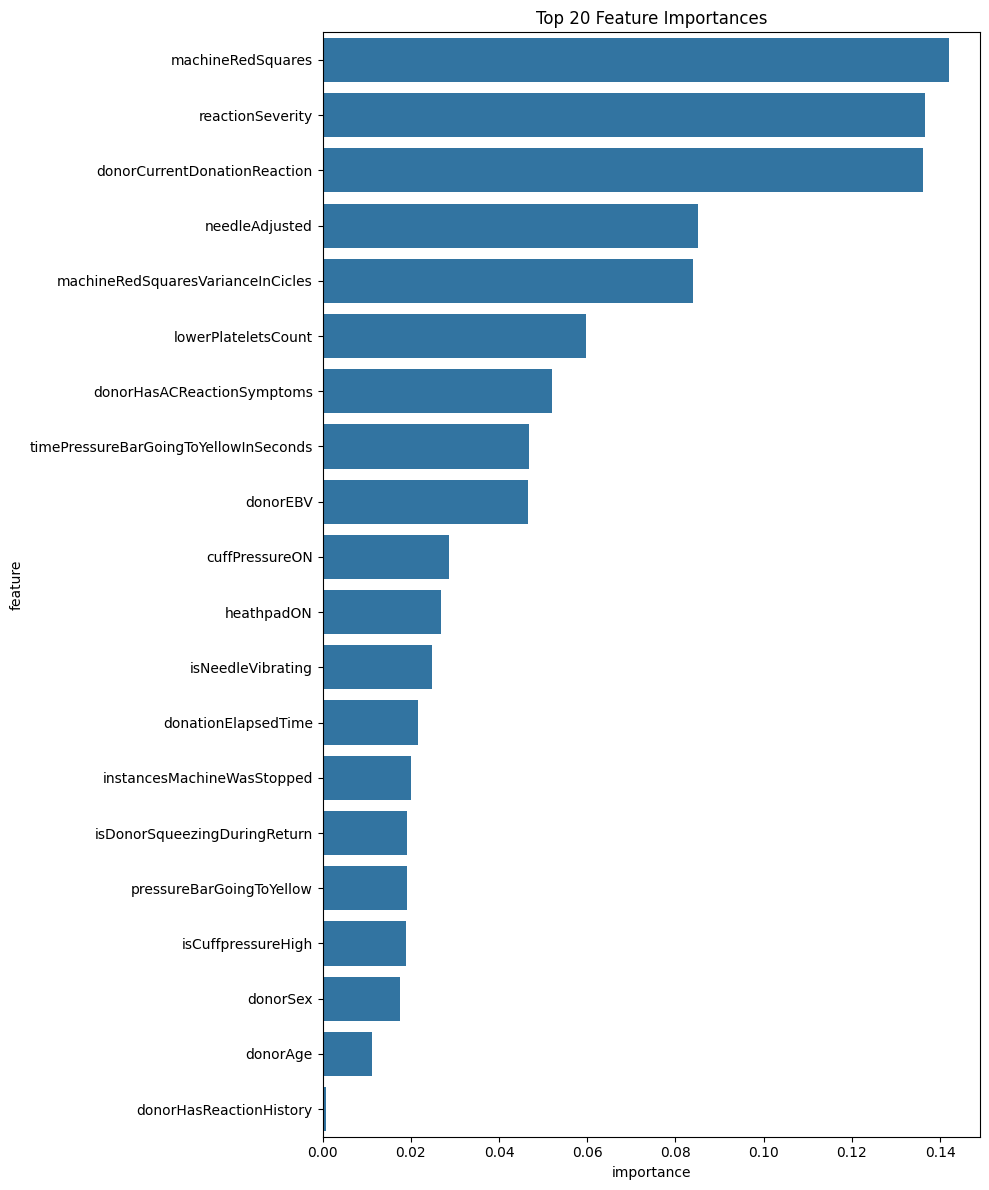

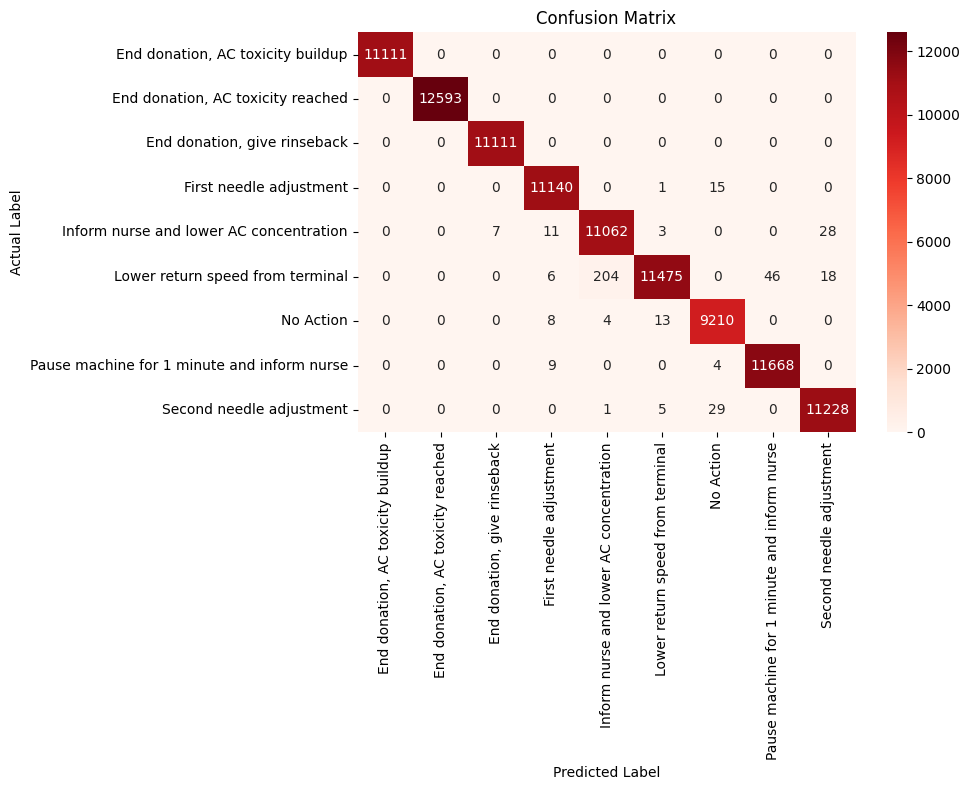

In [46]:
# Train the model
model = train_tuned_model(X_train, y_train)
feature_names = X_train.columns.tolist()

# Save the model
model_filename = 'model_collection/XXXL_model_2/tuned_random_forest_model.joblib'
print(f"Saving model to {model_filename}...")
joblib.dump(model, model_filename)

# Save the encoder dictionary
encoders_filename = 'model_collection/XXXL_model_2/label_encoders.joblib'
print(f"Saving encoders to {encoders_filename}...")
joblib.dump(le_dict, encoders_filename)

# Save the feature names
features_filename = 'model_collection/XXXL_model_2/feature_names.joblib'
print(f"Saving feature names to {features_filename}...")
joblib.dump(feature_names, features_filename)
# Print model evaluation
evaluate_model(model, X_test, y_test, le_dict['outcome'])
# Get features names
feature_names = X_train.columns.tolist()
# Visualise features importance
show_feature_importances(model, feature_names)
# Visualise confusion matrix
plot_confusion_matrix(model, X_test, y_test, le_dict['outcome'])

## Model testing with scenarios

In [43]:
from colorama import Fore, Style

MODEL = joblib.load('model_collection/XXXL_model_2/tuned_random_forest_model.joblib')
LE_DICT = joblib.load('model_collection/XXXL_model_2/label_encoders.joblib')
FEATURES_NAMES = joblib.load('model_collection/XXXL_model_2/feature_names.joblib')

# Testing features
features = [{
        'donorAge': 55,
        'donorHasACReactionSymptoms': 'yes',
        'firstDonation': 'no',
        'machineRedSquares': 7,
        'reactionSeverity': 'low',
        'donorCurrentDonationReaction': 1,
        'timePressureBarGoingToYellowInSeconds': 0,
        'donorHasReactionHistory': 'yes',
        'instancesMachineWasStopped': 2,
        'cuffPressureON': 'yes',
        'lowerPlateletsCount': 220,
        'donationElapsedTime': 64,
        'isDonorSqueezingDuringReturn': 'no',
        'donorSex': 'M',
        'needleAdjusted': 2,
        'isCuffpressureHigh': 'no',
        'isNeedleVibrating': 'no',
        'donorHasLowDrawHistory': 'no',
        'donorHasHighReturnHistory': 'yes',
        'donorEBV': 7.0,
        'heathpadON': 'yes',
        'machineRedSquaresVarianceInCicles': 2,
        'pressureBarGoingToYellow': 'no'
    },
    {
        'donorAge': 55,
        'donorHasACReactionSymptoms': 'yes',
        'firstDonation': 'no',
        'machineRedSquares': 2,
        'reactionSeverity': 'medium',
        'donorCurrentDonationReaction': 1,
        'timePressureBarGoingToYellowInSeconds': 0,
        'donorHasReactionHistory': 'yes',
        'instancesMachineWasStopped': 2,
        'cuffPressureON': 'yes',
        'lowerPlateletsCount': 320,
        'donationElapsedTime': 54,
        'isDonorSqueezingDuringReturn': 'no',
        'donorSex': 'M',
        'needleAdjusted': 0,
        'isCuffpressureHigh': 'no',
        'isNeedleVibrating': 'no',
        'donorHasLowDrawHistory': 'no',
        'donorHasHighReturnHistory': 'yes',
        'donorEBV': 6.5,
        'heathpadON': 'yes',
        'machineRedSquaresVarianceInCicles': 8,
        'pressureBarGoingToYellow': 'no'
    },
    {
        'donorAge': 55,
        'donorHasACReactionSymptoms': 'yes',
        'firstDonation': 'no',
        'machineRedSquares': 2,
        'reactionSeverity': 'low',
        'donorCurrentDonationReaction': 3,
        'timePressureBarGoingToYellowInSeconds': 0,
        'donorHasReactionHistory': 'yes',
        'instancesMachineWasStopped': 2,
        'cuffPressureON': 'yes',
        'lowerPlateletsCount': 320,
        'donationElapsedTime': 54,
        'isDonorSqueezingDuringReturn': 'no',
        'donorSex': 'M',
        'needleAdjusted': 0,
        'isCuffpressureHigh': 'no',
        'isNeedleVibrating': 'no',
        'donorHasLowDrawHistory': 'no',
        'donorHasHighReturnHistory': 'yes',
        'donorEBV': 6.5,
        'heathpadON': 'yes',
        'machineRedSquaresVarianceInCicles': 8,
        'pressureBarGoingToYellow': 'no'
    },
    {
        'donorAge': 25,
        'donorHasACReactionSymptoms': 'no',
        'firstDonation': 'no',
        'machineRedSquares': 3,
        'reactionSeverity': 'none',
        'donorCurrentDonationReaction': 0,
        'timePressureBarGoingToYellowInSeconds': 0,
        'donorHasReactionHistory': 'yes',
        'instancesMachineWasStopped': 0,
        'cuffPressureON': 'yes',
        'lowerPlateletsCount': 250,
        'donationElapsedTime': 10,
        'isDonorSqueezingDuringReturn': 'no',
        'donorSex': 'F',
        'needleAdjusted': 0,
        'isCuffpressureHigh': 'no',
        'isNeedleVibrating': 'yes',
        'donorHasLowDrawHistory': 'no',
        'donorHasHighReturnHistory': 'yes',
        'donorEBV': 4.5,
        'heathpadON': 'yes',
        'machineRedSquaresVarianceInCicles': 0,
        'pressureBarGoingToYellow': 'no'
    },
    {
        'donorAge': 55,
        'donorHasACReactionSymptoms': 'no',
        'firstDonation': 'no',
        'machineRedSquares': 5,
        'reactionSeverity': 'none',
        'donorCurrentDonationReaction': 0,
        'timePressureBarGoingToYellowInSeconds': 0,
        'donorHasReactionHistory': 'no',
        'instancesMachineWasStopped': 2,
        'cuffPressureON': 'yes',
        'lowerPlateletsCount': 400,
        'donationElapsedTime': 54,
        'isDonorSqueezingDuringReturn': 'yes',
        'donorSex': 'M',
        'needleAdjusted': 1,
        'isCuffpressureHigh': 'no',
        'isNeedleVibrating': 'yes',
        'donorHasLowDrawHistory': 'yes',
        'donorHasHighReturnHistory': 'yes',
        'donorEBV': 5.5,
        'heathpadON': 'yes',
        'machineRedSquaresVarianceInCicles': 2,
        'pressureBarGoingToYellow': 'no'
    },
    {
        'donorAge': 55,
        'donorHasACReactionSymptoms': 'no',
        'firstDonation': 'no',
        'machineRedSquares': 1,
        'reactionSeverity': 'none',
        'donorCurrentDonationReaction': 0,
        'timePressureBarGoingToYellowInSeconds': 8,
        'donorHasReactionHistory': 'yes',
        'instancesMachineWasStopped': 0,
        'cuffPressureON': 'yes',
        'lowerPlateletsCount': 320,
        'donationElapsedTime': 34,
        'isDonorSqueezingDuringReturn': 'no',
        'donorSex': 'F',
        'needleAdjusted': 0,
        'isCuffpressureHigh': 'no',
        'isNeedleVibrating': 'no',
        'donorHasLowDrawHistory': 'no',
        'donorHasHighReturnHistory': 'yes',
        'donorEBV': 5.5,
        'heathpadON': 'yes',
        'machineRedSquaresVarianceInCicles': 12,
        'pressureBarGoingToYellow': 'yes'
    },
    {
        'donorAge': 37,
        'donorHasACReactionSymptoms': 'no',
        'firstDonation': 'no',
        'machineRedSquares': 12,
        'reactionSeverity': 'none',
        'donorCurrentDonationReaction': 0,
        'timePressureBarGoingToYellowInSeconds': 0,
        'donorHasReactionHistory': 'yes',
        'instancesMachineWasStopped': 2,
        'cuffPressureON': 'yes',
        'lowerPlateletsCount': 220,
        'donationElapsedTime': 14,
        'isDonorSqueezingDuringReturn': 'no',
        'donorSex': 'M',
        'needleAdjusted': 2,
        'isCuffpressureHigh': 'no',
        'isNeedleVibrating': 'no',
        'donorHasLowDrawHistory': 'no',
        'donorHasHighReturnHistory': 'yes',
        'donorEBV': 5.5,
        'heathpadON': 'yes',
        'machineRedSquaresVarianceInCicles': 1,
        'pressureBarGoingToYellow': 'no'
    },
    {
        'donorAge': 29,
        'donorHasACReactionSymptoms': 'yes',
        'firstDonation': 'no',
        'machineRedSquares': 3,
        'reactionSeverity': 'high',
        'donorCurrentDonationReaction': 1,
        'timePressureBarGoingToYellowInSeconds': 3,
        'donorHasReactionHistory': 'yes',
        'instancesMachineWasStopped': 0,
        'cuffPressureON': 'yes',
        'lowerPlateletsCount': 400,
        'donationElapsedTime': 67,
        'isDonorSqueezingDuringReturn': 'no',
        'donorSex': 'M',
        'needleAdjusted': 0,
        'isCuffpressureHigh': 'no',
        'isNeedleVibrating': 'no',
        'donorHasLowDrawHistory': 'no',
        'donorHasHighReturnHistory': 'yes',
        'donorEBV': 7.1,
        'heathpadON': 'yes',
        'machineRedSquaresVarianceInCicles': 14,
        'pressureBarGoingToYellow': 'yes'
    }
]

outcomes = [
    'Inform nurse and lower AC concentration',
    'Pause machine for 1 minute and inform nurse',
    'End donation, AC toxicity buildup',
    'First needle adjustment',
    'Second needle adjustment',
    'Lower return speed from terminal',
    'End donation, give rinseback',
    'End donation, AC toxicity reached'
]

def run_inference(params, idx, set_outcomes):
    '''
    '''
    # Convert to DataFrame
    data_df = pd.DataFrame([params])
    df_encoded = data_df.copy()

    # Apply the *ORIGINAL* encoders
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            # Check if the column was encoded during training
            if col in LE_DICT:
                le = LE_DICT[col] # Get the *original* encoder
                
                # Use 'transform' ONLY. Do NOT use 'fit' or 'fit_transform'
                df_encoded[col] = le.transform(df_encoded[col])
            else:
                print(f"Warning: Column '{col}' was not encoded during training.")

    # CRITICAL: Ensure column order matches training
    df_encoded = df_encoded[FEATURES_NAMES] # X_train.columns is from your training cell

    # Now, predict
    pred = MODEL.predict_proba(df_encoded)

    # Get the outcome label from the *original* outcome encoder
    predicted_index = MODEL.predict(df_encoded)[0]
    predicted_label = LE_DICT['outcome'].inverse_transform([predicted_index])[0]
    print(f'\n    Running inference on set number {idx+1}')
    if predicted_label == set_outcomes[idx]:
        print(Fore.GREEN + f"### Predicted Label: {predicted_label} ###")
        print(Fore.GREEN + f"### Actual Label: {set_outcomes[idx]} ###\n")
    else:
        print(Fore.RED + f"### Predicted Label: {predicted_label} ###")
        print(Fore.YELLOW + f"### Actual Label: {set_outcomes[idx]} ###\n")
    print(Style.RESET_ALL)


In [44]:
for idx, params in enumerate(features):
    run_inference(params, idx, outcomes)


    Running inference on set number 1
### Predicted Label: Inform nurse and lower AC concentration ###
### Actual Label: Inform nurse and lower AC concentration ###



    Running inference on set number 2
### Predicted Label: Pause machine for 1 minute and inform nurse ###
### Actual Label: Pause machine for 1 minute and inform nurse ###



    Running inference on set number 3
### Predicted Label: End donation, AC toxicity buildup ###
### Actual Label: End donation, AC toxicity buildup ###



    Running inference on set number 4
### Predicted Label: First needle adjustment ###
### Actual Label: First needle adjustment ###



    Running inference on set number 5
### Predicted Label: Second needle adjustment ###
### Actual Label: Second needle adjustment ###



    Running inference on set number 6
### Predicted Label: Lower return speed from terminal ###
### Actual Label: Lower return speed from terminal ###



    Running inference on set number 7
### Predicted Label: End donation